Dataset : Uber and Lyft Dataset Boston, MA

Dataset ini berisi data histori perjalanan customer dari 26 Nov 2018 - 19 Dec 2018 pada Uber dan Lyft.  

Latar Belakang Objective : Menurut jurnal customer satisfaction (https://www.researchgate.net/publication/272673242_Analysis_of_Influence_of_Price_to_Customer_Satisfaction_Based_on_the_Prediction_Models), **prediksi harga** merupakan salah satu faktor yang **meningkatkan customer satisfaction**. Dengan **meningkatnya customer satisfaction**, maka customer akan semakin loyal sehingga **mengurangi risiko** berkurangnya customer. Yang artinya **model prediksi harga yang baik diperlukan** untuk meningkatkan customer satisfaction.

Objective : Membuat model prediksi harga yang baik untuk meningkatkan customer satisfaction dengan tujuan untuk mengurangi risiko berkurangnya customer

Library adalah package python yang digunakan untuk membantu mempersingkat beberapa proses. Library ini nantinya akan saya gunakan untuk kebutuhan import data, cleaning data, analisis data, visualisasi data, pembuatan model dan pengujian model.

In [1]:
#Import library dengan command import dan assign ke variabel untuk mempermudah pemanggilan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer #untuk censoring
from sklearn.preprocessing import RobustScaler #untuk scaling feature extreme skew
from sklearn.preprocessing import StandardScaler #untuk scaling feature normal
from sklearn.preprocessing import OneHotEncoder #untuk encoding
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge #untuk perbandingan model dengan parameter tuning
from scipy.stats import loguniform # untuk generate nilai parameter tuning
from sklearn.model_selection import RandomizedSearchCV # untuk parameter tuning
from sklearn.metrics import mean_squared_error,r2_score #untuk evaluasi mode
import pickle #export file
import json #export file

Setelah import library selanjutnya adalah Data Loading. Data Loading adalah proses memasukkan data ke dalam python.
Dataset yang saya gunakan adalah  data **Uber and Lyft Dataset Boston, MA**.

In [2]:
#Import data ke Python dengan syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
#Tampilkan head untuk mengetahui 5 data teratas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
#Mengecek informasi dataset dengan .info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari informasi diatas dapat disimpulkan bahwa 
- Dataset terdiri dari `693.071 data` dan `57 feature`
- Terdapat **29** feature yang memiliki tipe data desimal(`float64`)
- Terdapat **17** feature yang memiliki tipe data integer(`int64`)
- Terapat **11** feature yang memiliki tipe data string(`object`)

In [5]:
#Mengubah tipe data dari feature 'datetime' dengan syntax pd.to_datetime
df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
#Mengecek statistik deskriptif dengan syntax .describe
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Dari statistik deskriptif diatas dapat diambil insight bahwa :
- Dataset memiliki record **24 jam** mengenai penggunaan layanan transportasi Uber dan Lyft
- Rata-Rata penggunaan layanan transportasi adalah pada jam **11-12 siang**
- Dataset memiliki rentang pengambilan data pada bulan **November-Desember**
- Dataset memiliki record data berkisar dari tanggal **1** hingga tanggal **30**
- Rata-Rata penggunaan layanan transportasi ada pada tanggal **17-18**
- Harga layanan transportasi berkisar antara **2.5 - 97.5** dan memiliki rata-rata **16.5**
- Customer yang menggunakan layanan transportasi memiliki jarak tujuan berkisar antara **0.02-7.86** dengan rata-rata **2.19**

Yang pertama adalah mengetahui persebaran hari pada dataset dengan tujuan untuk mengetahui : 
1. Apakah terdapat pengambilan data setiap harinya? 
2. Apakah ada gap per-harinya?
3. Hari apa sajakah layanan transportasi sering digunakan?

Yang harus dilakukan pertama adalah pembuatan dataframe group hari

In [7]:
#Group berdasarkan hari
df_day = df.groupby('day').size().reset_index(name="counts")

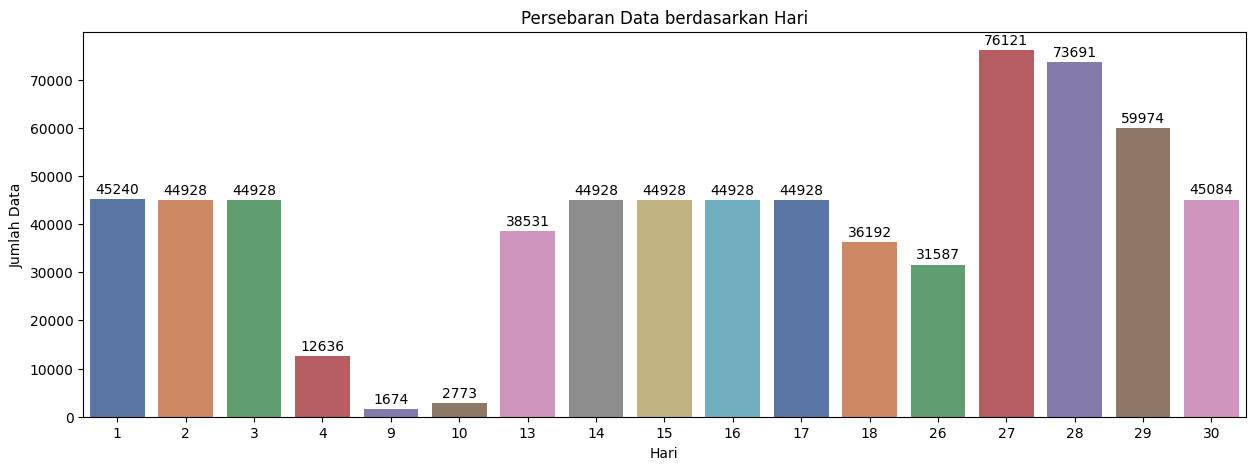

In [8]:
#Visualisasi persebaran hari
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='day',y='counts', data=df_day, palette='deep')
ax.set(xlabel='Hari' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Hari')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik diatas dapat disimpulkan bahwa
- Penggunaan layanan transportasi Uber dan Lyft, tanggal 5-8, 11-12, 19-25 pada bulan November dan bulan Desember **tidak tersedia**
- Penggunaan layanan transportasi pada Uber dan Lyft tidak tersebar merata (ada gap per harinya)
- Layanan transportasi pada Uber dan Lyft sering digunakan pada tanggal 27-28

In [9]:
#Group berdasarkan bulan
df_month = df.groupby('month').size().reset_index(name="counts")
df_month

,month,counts
0,11,286457
1,12,406614


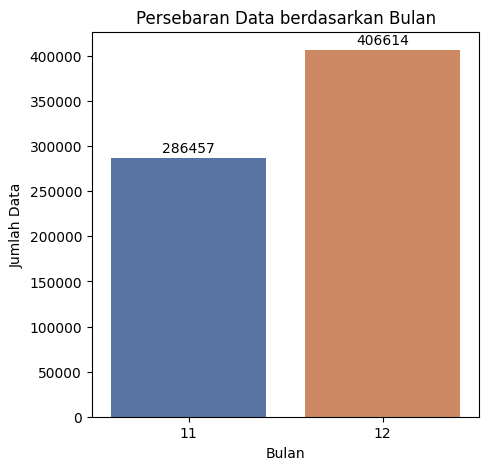

In [10]:
#Visualisasi persebaran bulan
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='month',y='counts', data=df_month, palette='deep')
ax.set(xlabel='Bulan' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Bulan')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik diatas dapat disimpulkan bahwa
- Layanan transportasi pada Uber dan Lift banyak digunakan pada bulan Desember

Selanjutnya adalah mengetahui persebaran jam pada dataset dengan tujuan untuk :

 1. Mengetahui pada jam berapa kah layanan transportasi uber dan lyft sering digunakan
 2. Rata-rata penggunaan layanan transportasi/jam nya
 
 Yang pertama dilakukan adalah pembuatan dataframe groupby jam

In [11]:
#Group berdasarkan jam
df_hour = df.groupby('hour').size().reset_index(name="counts")


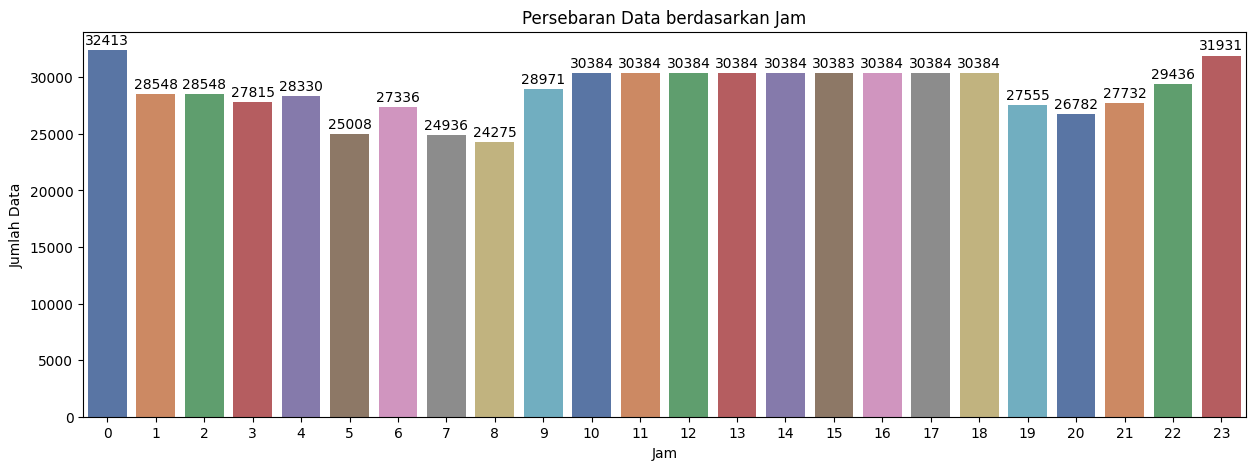

In [12]:
#Visualisasi persebaran jam
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='hour',y='counts', data=df_hour, palette='deep')
ax.set(xlabel='Jam' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Jam')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

In [13]:
#Rata-rata jumlah layanan transportasi yang digunakan/jam nya
print('Rata-rata jumlah layanan transportasi yang digunakan/jam nya adalah ',round(df_hour['counts'].mean(),2))

Rata-rata jumlah layanan transportasi yang digunakan/jam nya adalah  28877.96


Dari grafik diatas dapat disimpulkan bahwa
- Layanan transportasi sering digunakan pada jam 12 malam
- Rata-rata jumlah layanan transportasi yang digunakan/jam nya adalah 28.877 layanan
- Tidak terdapat gap yang jauh untuk penggunaan layanan transportasi setiap jamnya


Selanjutnya adalah mengetahui persebaran source dan destination pada dataset untuk mengetahui:

 1. Tempat asal dari customer yang sering menggunakan layanan transportasi
 2. Tujuan customer yang sering menggunakan layanan transportasi

In [14]:
#Group berdasarkan source
df_source = df.groupby('source').size().reset_index(name="counts")
df_source

,source,counts
0,Back Bay,57792
1,Beacon Hill,57403
2,Boston University,57764
3,Fenway,57757
4,Financial District,58857
5,Haymarket Square,57736
6,North End,57763
7,North Station,57118
8,Northeastern University,57756
9,South Station,57750


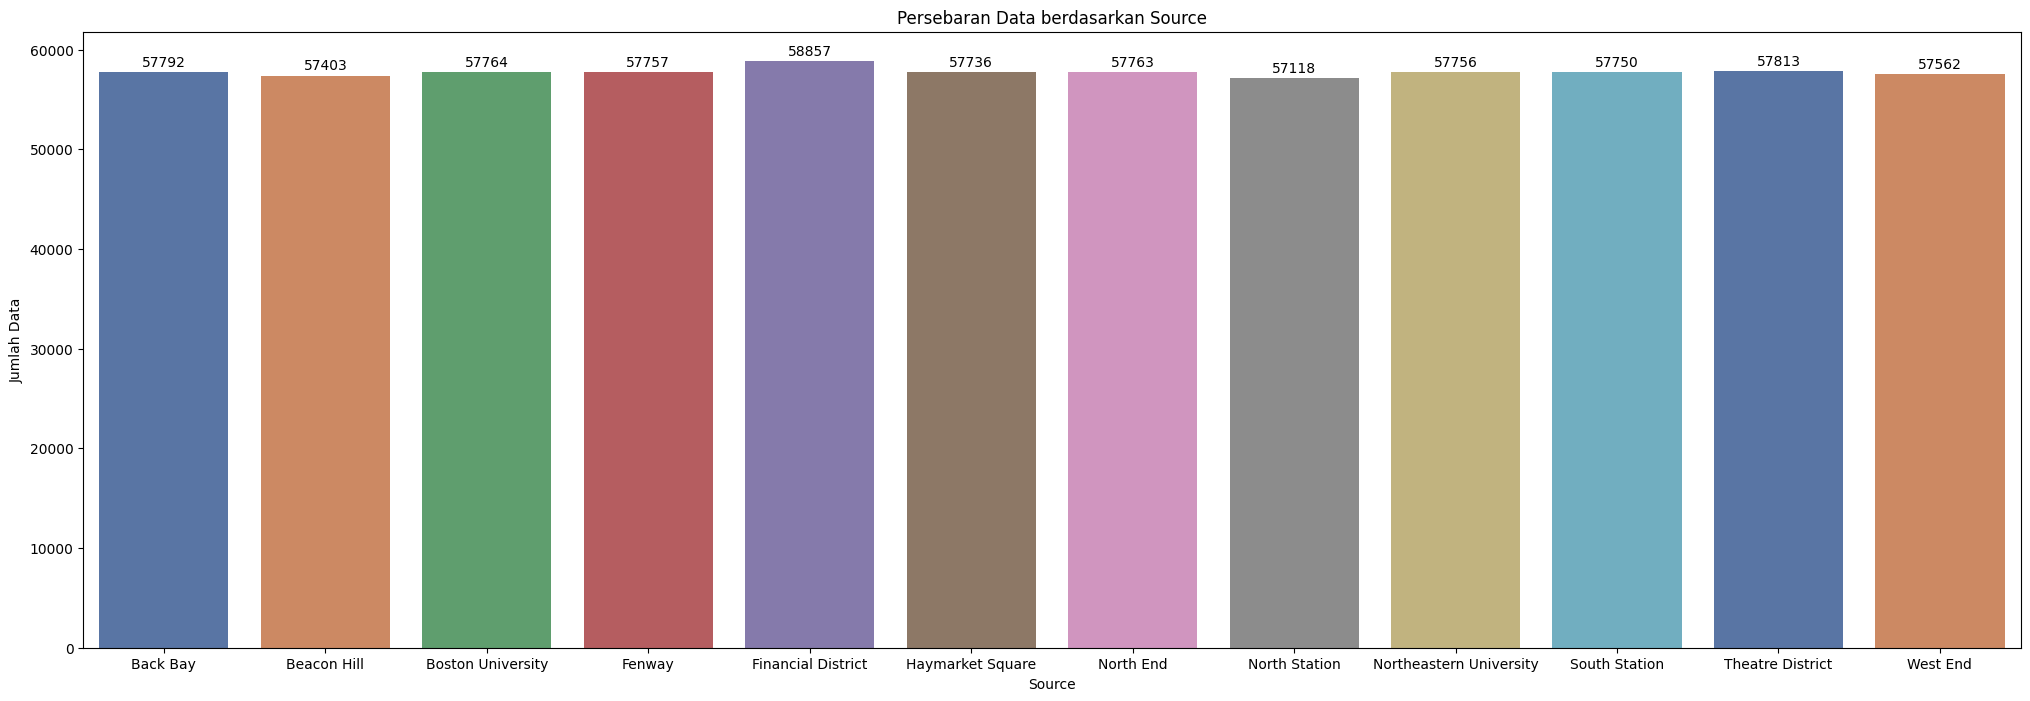

In [15]:
#Visualisasi persebaran source
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(x='source',y='counts', data=df_source, palette='deep')
ax.set(xlabel='Source' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Source')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik diatas dapat disimpulkan bahwa
- Tempat customer menggunakan layanan transportasi di setiap source nya merata (sekitar 57.000 an)


In [16]:
#Group berdasarkan destination
df_destination = df.groupby('destination').size().reset_index(name="counts")
df_destination

,destination,counts
0,Back Bay,57780
1,Beacon Hill,57403
2,Boston University,57764
3,Fenway,57757
4,Financial District,58851
5,Haymarket Square,57764
6,North End,57756
7,North Station,57119
8,Northeastern University,57755
9,South Station,57749


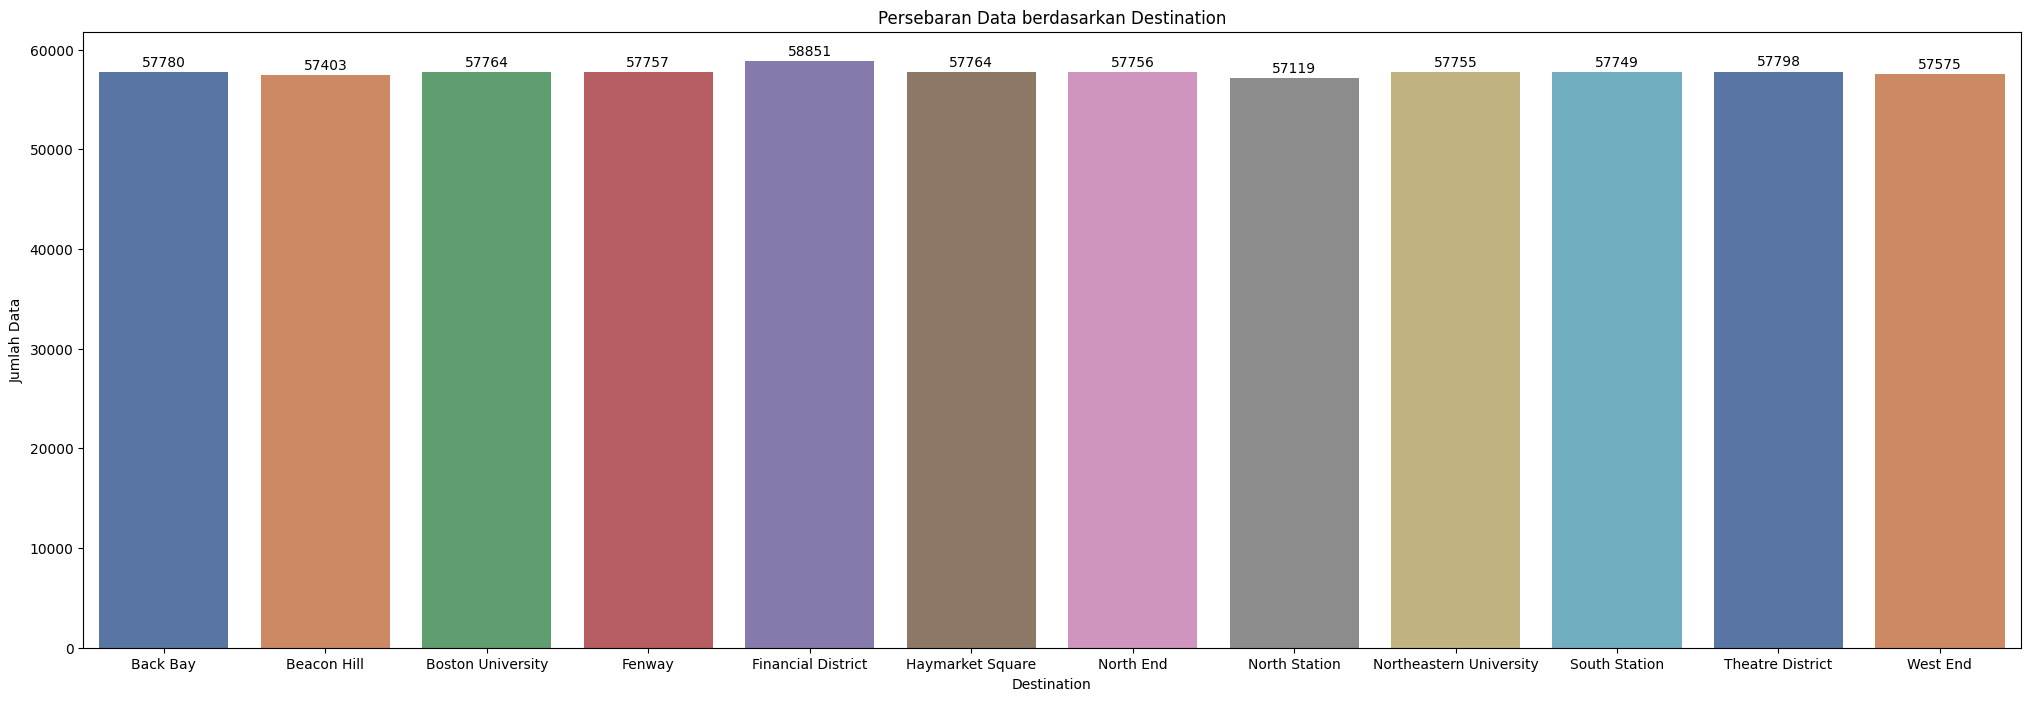

In [17]:
#Visualisasi persebaran destination
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(x='destination',y='counts', data=df_destination, palette='deep')
ax.set(xlabel='Destination' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Destination')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik diatas dapat disimpulkan bahwa
- Destination dari customer yang menggunakan layanan transportasi merata (sekitar 57.000 an)


In [18]:
#Group berdasarkan source dan destination
df_source_desti = df.groupby(['source','destination']).size().reset_index(name="counts")

In [19]:
#Mencari tujuan dan asal customer yang sering menggunakan layanan transportasi
max_source_desti = df_source_desti['counts'].max()
df_source_desti[df_source_desti['counts'] == max_source_desti]

,source,destination,counts
29,Financial District,South Station,10352
56,South Station,Financial District,10352


Dari data diatas dapat disimpulkan bahwa layanan transportasi sering digunakan oleh customer yang:
- Berada pada `Financial District` dengan tujuan `South Station`
- Berada pada `South Station` dengan tujuan `Financial District`


In [20]:
#Group berdasarkan cab type
df_cab = df.groupby('cab_type').size().reset_index(name="counts")
df_cab

,cab_type,counts
0,Lyft,307408
1,Uber,385663


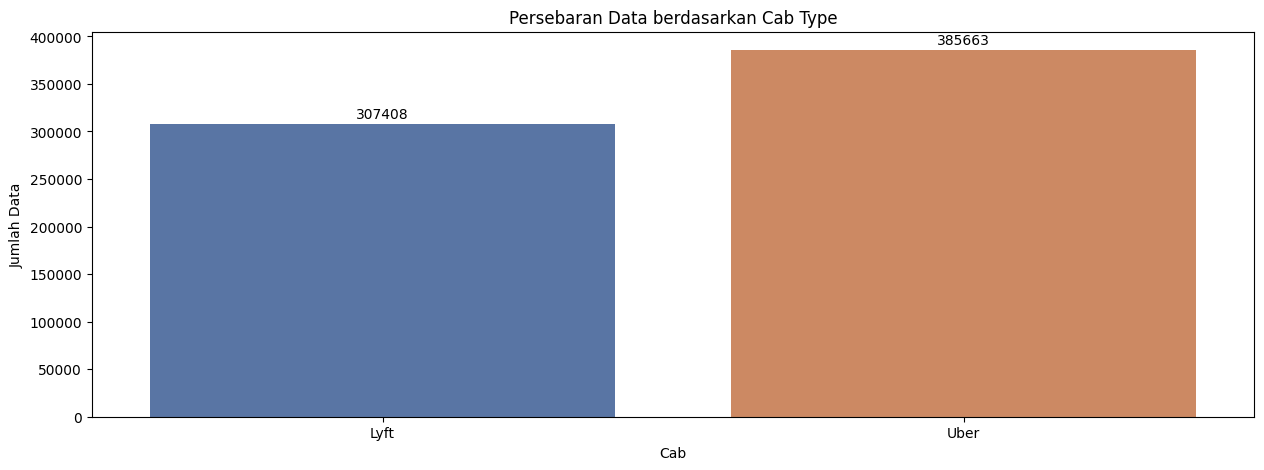

In [21]:
#Visualisasi persebaran cab type
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='cab_type',y='counts', data=df_cab, palette='deep')
ax.set(xlabel='Cab' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Cab Type')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari data diatas dapat disimpulkan bahwa :
- Uber lebih sering digunakan oleh customer dari pada Lyft

In [22]:
#membuat dataframe group by day, month dan hour
df_month_cab =df.groupby(by=["month","cab_type"]).size().reset_index(name="counts")
df_day_cab =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
df_hour_cab =df.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")

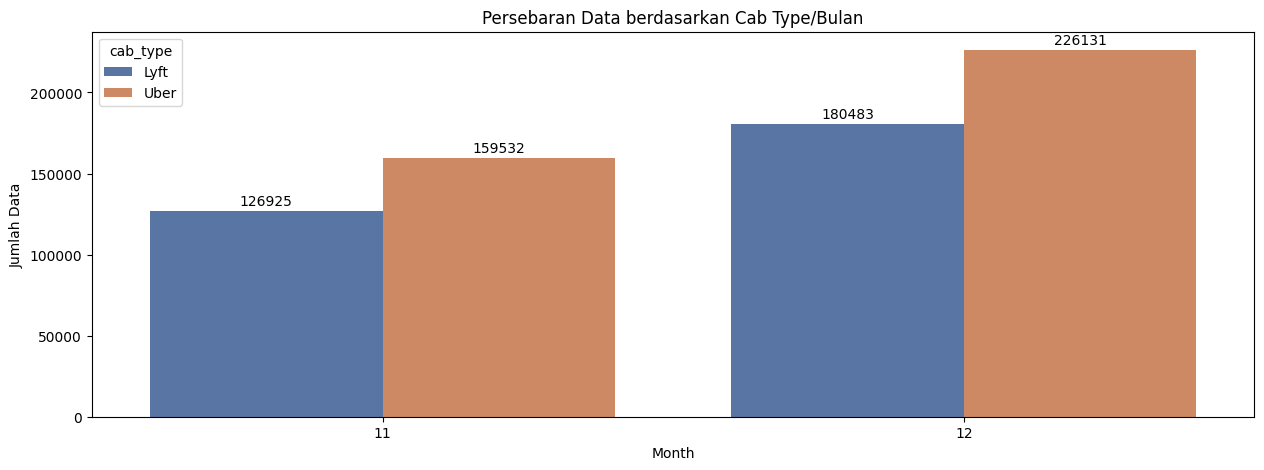

In [23]:
#Visualisasi persebaran cab type Month
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='month',y='counts', data=df_month_cab, palette='deep', hue= 'cab_type')
ax.set(xlabel='Month' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Cab Type/Bulan')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

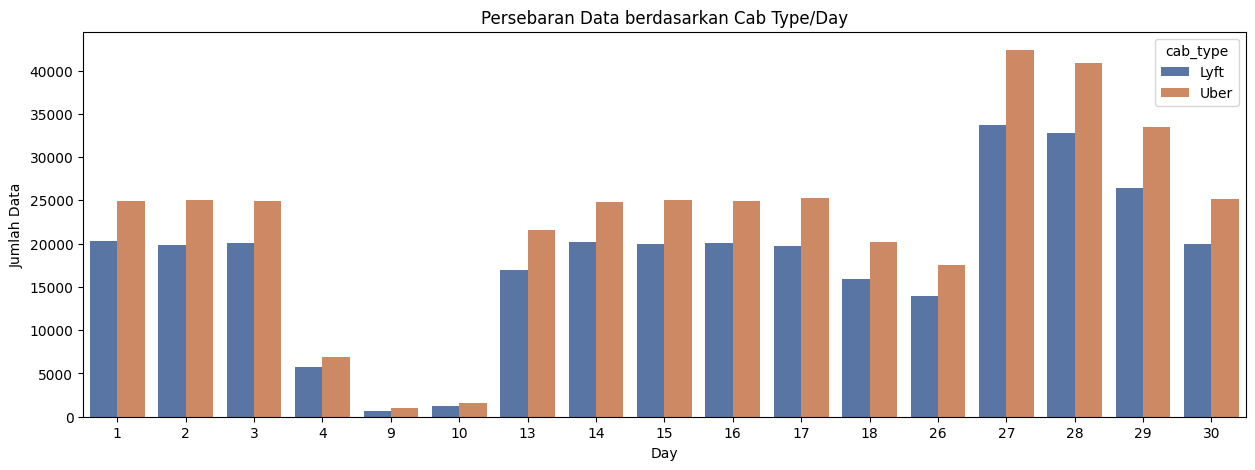

In [24]:
#Visualisasi persebaran cab type Day
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='day',y='counts', data=df_day_cab, palette='deep', hue= 'cab_type')
ax.set(xlabel='Day' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Cab Type/Day')
#menunjukkan plot
plt.show()

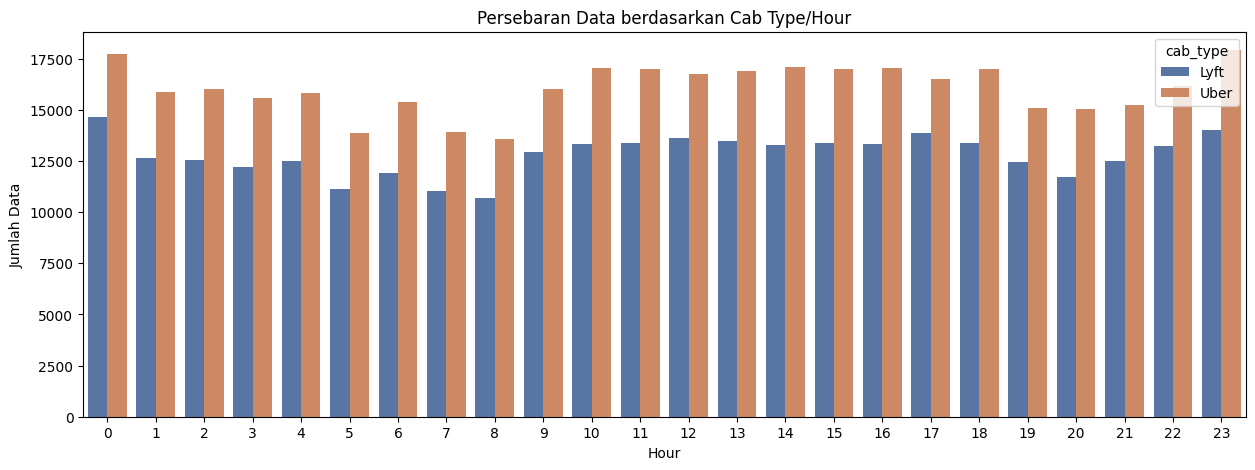

In [25]:
#Visualisasi persebaran cab type Hour
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='hour',y='counts', data=df_hour_cab, palette='deep', hue= 'cab_type')
ax.set(xlabel='Hour' , ylabel='Jumlah Data', title= 'Persebaran Data berdasarkan Cab Type/Hour')
#menunjukkan plot
plt.show()

Dari 3 visualiasi di atas dapat disimpulkan bahwa :
- Uber mendominasi lyft pada bulan november-desember
- Uber mendominasi lyft setiap hari dan setiap jam

In [26]:
#Group by berdasarkan cab_type, source, destination dan price
df_cab_price = df.groupby(['source','destination','cab_type','price']).size().rename('count').reset_index()

In [27]:
#Mencari harga maksimal Uber dan lyft dengan slicing
max_p_uber = df[df['cab_type'] == 'Uber']['price'].max()
max_p_lyft = df[df['cab_type'] == 'Lyft']['price'].max()


print('Max Price Uber ', max_p_uber)
print('Max Price Lyft ', max_p_lyft)

Max Price Uber  89.5
Max Price Lyft  97.5


In [28]:
#Mencari destinasi harga maksimal uber dengan slicing
df_cab_price[(df_cab_price['cab_type'] == 'Uber') & (df_cab_price['price'] == max_p_uber)]

,source,destination,cab_type,price,count
2742,Financial District,Northeastern University,Uber,89.5,1


In [29]:
#Mencari destinasi harga maksimal lyft dengan slicing
df_cab_price[(df_cab_price['cab_type'] == 'Lyft') & (df_cab_price['price'] == max_p_lyft)]

,source,destination,cab_type,price,count
2377,Financial District,Fenway,Lyft,97.5,1


Dari data diatas dapat disimpulkan bahwa
- Uber memiliki harga maksimal pada 89.5 dengan source `Financial District` ke `Northeastern University`
- Lyft memiliki harga maksimal pada 97.5 dengan source `Financial District` ke `Fenway`
- Secara overall Lyft lebih mahal dari pada Uber


In [30]:
print('Rata-Rata harga Uber ', df[df['cab_type'] == 'Uber']['price'].mean())
print('Rata-Rata harga Lyft ', df[df['cab_type'] == 'Lyft']['price'].mean())
print('Rata-Rata harga Jasa transportasi ', df['price'].mean())

Rata-Rata harga Uber  15.795343166912708
Rata-Rata harga Lyft  17.351396125019512
Rata-Rata harga Jasa transportasi  16.545125490614065


Dari data diatas dapat disimpulkan bahwa
- Rata-Rata harga Uber  **15.79**
- Rata-Rata harga Lyft  **17.35**
- Rata-Rata harga Jasa transportasi  **16.54**


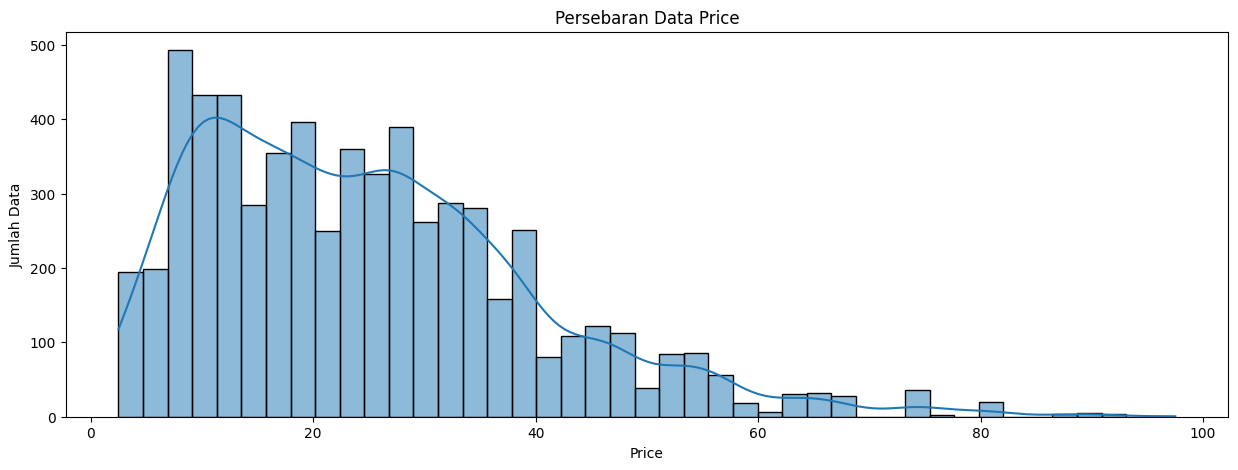

In [31]:
#Visualisasi persebaran harga
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data = df_cab_price['price'], kde = True)
ax.set(xlabel='Price' , ylabel='Jumlah Data', title= 'Persebaran Data Price')

#menunjukkan plot
plt.show()

Dari grafik diatas dapat disimpulkan bahwa :
- Harga terdistribusi dengan frekuensi tinggi, pada harga 40 kebawah

In [32]:
#Membuat df baru utk menghitung rata-rata price (source-destination) tanpa memperhatikan jasa layanan transportasi
df_cab_price2 = df_cab_price.groupby(['source','destination'])['price'].mean().rename('mean price').reset_index()
df_cab_price2

,source,destination,mean price
0,Back Bay,Boston University,20.226027
1,Back Bay,Fenway,20.852941
2,Back Bay,Haymarket Square,27.215686
3,Back Bay,North End,30.931034
4,Back Bay,Northeastern University,20.235139
5,Back Bay,South Station,29.090517
6,Beacon Hill,Boston University,23.551724
7,Beacon Hill,Fenway,22.908537
8,Beacon Hill,Haymarket Square,20.321918
9,Beacon Hill,North End,22.775000


In [33]:
#print range mean price (source-destination)
print('Range mean price ' ,round(df_cab_price2['mean price'].min(),2) , ' - ',round(df_cab_price2['mean price'].max(),2) )

Range mean price  16.6  -  35.0


Dari data diatas dapat disimpulkan bahwa
- Range mean price untuk jasa layanan transportasi ada pada 16.6 - 35

In [34]:
#Group by berdasarkan surge multiplier, hour & day
df_surge = df.groupby(['day','hour','month','surge_multiplier']).size().rename('count').reset_index()

In [35]:
#Slicing multiplier >1
df_surge2 = df_surge[df_surge['surge_multiplier']>1]
df_surge2

,day,hour,month,surge_multiplier,count
1,1,0,12,1.25,34
2,1,0,12,1.50,6
3,1,0,12,1.75,14
5,1,1,12,1.25,16
6,1,1,12,1.50,7
...,...,...,...,...,...
1725,30,22,11,2.00,5
1727,30,23,11,1.25,27
1728,30,23,11,1.50,10
1729,30,23,11,1.75,6


In [36]:
#Group by berdasarkan day & hour
df_surge_day = df_surge2.groupby('day')['count'].sum().rename('sum_surge').reset_index()
df_surge_hour = df_surge2.groupby('hour')['count'].sum().rename('sum_surge').reset_index()

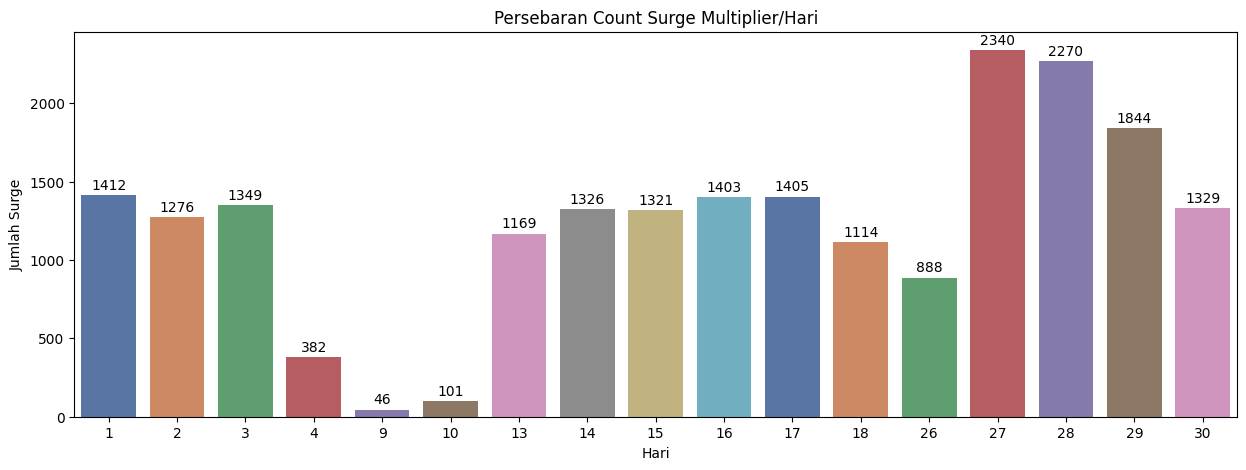

In [37]:
#Visualisasi persebaran surge/hari
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='day',y='sum_surge', data=df_surge_day, palette='deep')
ax.set(xlabel='Hari' , ylabel='Jumlah Surge', title= 'Persebaran Count Surge Multiplier/Hari')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik di-atas dapat disimpulkan bahwa **siklus surge** adalah sebagai berikut:
- Pada tanggal 1-3 sering terjadi surge kemudian setelah tanggal 3 menurun dan naik pada tanggal 13. Setelah itu surge cenderung stabil hingga tanggal 26. Kemudian surge pada tanggal 27 naik secara signifikan dan berangsur turun hingga tanggal 30

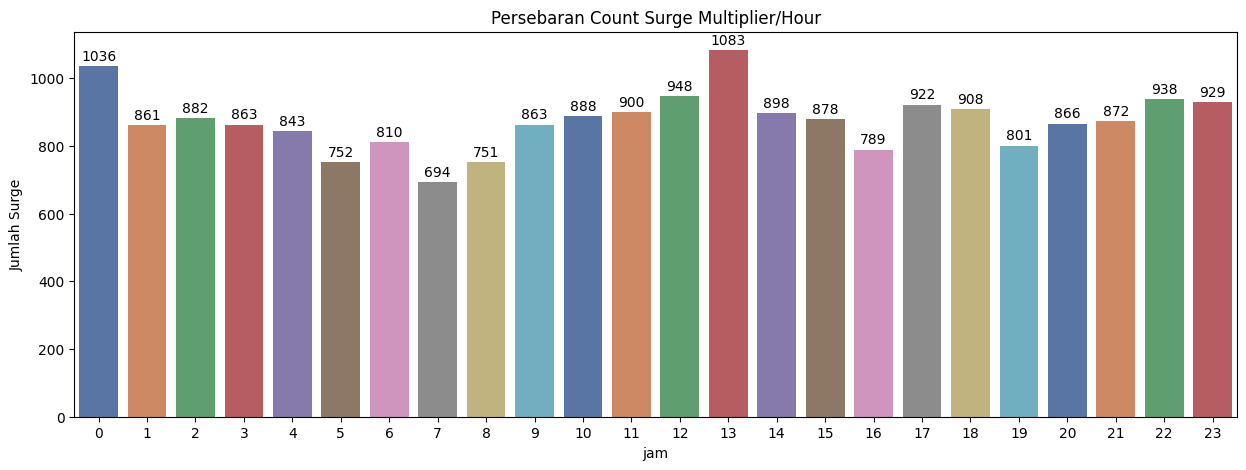

In [38]:
#Visualisasi persebaran surge setiap jam
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='hour',y='sum_surge', data=df_surge_hour, palette='deep')
ax.set(xlabel='jam' , ylabel='Jumlah Surge', title= 'Persebaran Count Surge Multiplier/Hour')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
#menunjukkan plot
plt.show()

Dari grafik di-atas dapat disimpulkan bahwa :
- Surge pada setiap jam selalu terjadi yang artinya **supply driver < demand driver**

In [39]:
#Definisi X dan y
X = df.drop(['price'], axis=1)
y = df['price']


In [40]:
#Menampilkan X
X

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,

In [41]:
#Menampilkan y
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [42]:
#Split X train, X test, y train dan y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (554456, 56)
Test Size  :  (138615, 56)


In [43]:
#Menampilkan X_train
X_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
499043,e49a97d1-43ff-46ad-97ff-74f210201f5c,1.544712e+09,14,13,12,2018-12-13 14:35:07,America/New_York,North Station,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.61,1.0,42.3519,-71.0643,25.55,21.85,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.59,3.11,4.22,1544738400,9.568,33.92,1544731200,27.05,1544781600,32.95,1544734800,24.47,1544785200,partly-cloudy-day,13.07,1033.93,344,0.24,1,9.568,327.5,1544702792,1544735604,0.21,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800
419201,651d207d-f515-47e3-b7c0-2b35397bfe35,1.543335e+09,16,27,11,2018-11-27 16:06:21,America/New_York,Northeastern University,Theatre District,Lyft,lyft_line,Shared,2.00,1.0,42.3429,-71.1003,41.00,34.42,Overcast,Light rain in the morning.,0.0000,0.00,0.83,11.16,17.48,1543338000,9.285,46.24,1543320000,33.60,1543399200,43.32,1543320000,30.08,1543399200,cloudy,36.27,989.50,258,1.00,1,9.285,333.5,1543319476,1543353358,0.68,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
395682,cc881e84-8256-43d1-9824-b3b6c31d1cce,1.543402e+09,10,28,11,2018-11-28 10:51:23,America/New_York,Northeastern University,West End,Lyft,lyft_lux,Lux Black,2.77,1.0,42.3661,-71.0631,34.40,29.99,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.78,4.89,7.74,1543431600,9.899,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-night,28.39,991.05,259,0.48,0,9.899,344.7,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
100690,ae24752a-ce82-4556-a681-b0a9e837c0d5,1.545100e+09,2,18,12,2018-12-18 02:20:05,America/New_York,Northeastern University,Theatre District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1.91,1.0,42.3519,-71.0643,37.06,31.82,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.69,6.65,11.71,1545022800,9.880,41.42,1545076800,23.89,1545138000,35.95,1545076800,11.83,1545134400,partly-cloudy-night,27.91,1001.12,279,0.68,0,9.880,369.3,1545048558,1545081262,0.33,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
619262,ee99180c-76a4-42bb-8c75-e609162fed5a,1.543649e+09,7,1,12,2018-12-01 07:28:02,America/New_York,South Station,Beacon Hill,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2.50,1.0,42.3661,-71.0631,34.37,31.07,Overcast,Light rain in the morning and overnight.,0.0000,0.00,0.78,3.76,3.82,1543672800,9.891,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,cloudy,28.31,1019.63,301,1.00,0,9.891,286.6,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516374,1464116e-79e4-47f2-8487-9bb6fce319d1,1.543515e+09,18,29,11,2018-11-29 18:02:59,America/New_York,West End,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,0.72,1.0,42.2148,-71.0330,43.65,37.25,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.52,12.55,23.67,1543514400,9.920,45.03,1543510800,28.90,1543579200,38.

<img src="https://imgur.com/vtVIrBa.png"></img>

In [44]:
#Concat X_train dan y_train untuk korelasi
X_y_train = pd.concat((X_train,y_train), axis=1)
X_y_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
499043,e49a97d1-43ff-46ad-97ff-74f210201f5c,1.544712e+09,14,13,12,2018-12-13 14:35:07,America/New_York,North Station,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.61,1.0,42.3519,-71.0643,25.55,21.85,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.59,3.11,4.22,1544738400,9.568,33.92,1544731200,27.05,1544781600,32.95,1544734800,24.47,1544785200,partly-cloudy-day,13.07,1033.93,344,0.24,1,9.568,327.5,1544702792,1544735604,0.21,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800,27.0
419201,651d207d-f515-47e3-b7c0-2b35397bfe35,1.543335e+09,16,27,11,2018-11-27 16:06:21,America/New_York,Northeastern University,Theatre District,Lyft,lyft_line,Shared,2.00,1.0,42.3429,-71.1003,41.00,34.42,Overcast,Light rain in the morning.,0.0000,0.00,0.83,11.16,17.48,1543338000,9.285,46.24,1543320000,33.60,1543399200,43.32,1543320000,30.08,1543399200,cloudy,36.27,989.50,258,1.00,1,9.285,333.5,1543319476,1543353358,0.68,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000,5.0
395682,cc881e84-8256-43d1-9824-b3b6c31d1cce,1.543402e+09,10,28,11,2018-11-28 10:51:23,America/New_York,Northeastern University,West End,Lyft,lyft_lux,Lux Black,2.77,1.0,42.3661,-71.0631,34.40,29.99,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.78,4.89,7.74,1543431600,9.899,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-night,28.39,991.05,259,0.48,0,9.899,344.7,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800,22.5
100690,ae24752a-ce82-4556-a681-b0a9e837c0d5,1.545100e+09,2,18,12,2018-12-18 02:20:05,America/New_York,Northeastern University,Theatre District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1.91,1.0,42.3519,-71.0643,37.06,31.82,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.69,6.65,11.71,1545022800,9.880,41.42,1545076800,23.89,1545138000,35.95,1545076800,11.83,1545134400,partly-cloudy-night,27.91,1001.12,279,0.68,0,9.880,369.3,1545048558,1545081262,0.33,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800,7.5
619262,ee99180c-76a4-42bb-8c75-e609162fed5a,1.543649e+09,7,1,12,2018-12-01 07:28:02,America/New_York,South Station,Beacon Hill,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2.50,1.0,42.3661,-71.0631,34.37,31.07,Overcast,Light rain in the morning and overnight.,0.0000,0.00,0.78,3.76,3.82,1543672800,9.891,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,cloudy,28.31,1019.63,301,1.00,0,9.891,286.6,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516374,1464116e-79e4-47f2-8487-9bb6fce319d1,1.543515e+09,18,29,11,2018-11-29 18:02:59,America/New_York,West End,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,0.72,1.0,42.2148,-71.0330,43.65,37.25,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.52,12.55,23.67,1543514400,9.920,45.0

In [45]:
#Membuat dataframe baru yang menampilkan korelasi feature numeric dengan feature price pada X_train
corr_price_Xtrain = X_y_train.corr(method='spearman')['price'].rename('corr').sort_values(ascending=False).reset_index()
corr_price_Xtrain

C:\Users\USER\AppData\Local\Temp\ipykernel_22296\3836945107.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_price_Xtrain = X_y_train.corr(method='spearman')['price'].rename('corr').sort_values(ascending=False).reset_index()


,index,corr
0,price,1.000000
1,distance,0.333681
2,surge_multiplier,0.165842
3,pressure,0.001413
4,month,0.001341
5,latitude,0.001193
6,windGust,0.000830
7,visibility.1,0.000767
8,visibility,0.000767
9,apparentTemperatureLow,0.000690


In [46]:
#Membuat list kolom numeric yang akan didrop (yang relasinya sangat lemah(hampir tidak ada korelasinya))
drop = corr_price_Xtrain[(corr_price_Xtrain['corr']<=0.1) & (corr_price_Xtrain['corr']>= -0.1)]['index'].to_list()
drop

['pressure',
 'month',
 'latitude',
 'windGust',
 'visibility.1',
 'visibility',
 'apparentTemperatureLow',
 'windSpeed',
 'hour',
 'ozone',
 'temperatureLowTime',
 'uvIndex',
 'timestamp',
 'apparentTemperatureLowTime',
 'temperatureMaxTime',
 'temperatureHighTime',
 'apparentTemperatureMinTime',
 'sunriseTime',
 'temperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureMaxTime',
 'temperatureMax',
 'uvIndexTime',
 'sunsetTime',
 'cloudCover',
 'temperatureMinTime',
 'apparentTemperatureHigh',
 'apparentTemperatureMax',
 'precipProbability',
 'precipIntensity',
 'windGustTime',
 'windBearing',
 'precipIntensityMax',
 'temperatureLow',
 'temperature',
 'apparentTemperature',
 'apparentTemperatureMin',
 'dewPoint',
 'temperatureMin',
 'humidity',
 'day',
 'longitude',
 'moonPhase']

In [47]:
#len dari drop
len(drop)

43

In [48]:
#Drop 43 feature numeric pada X_train dan X_test
X_train.drop(columns=drop,inplace=True)
X_test.drop(columns=drop,inplace=True)

In [49]:
#print shape setelah drop feature numeric
print('Shape df, ', df.shape)
print('Shape X_train, ', X_train.shape)
print('Shape X_test, ', X_test.shape)

Shape df,  (693071, 57)
Shape X_train,  (554456, 13)
Shape X_test,  (138615, 13)


In [50]:
#Mengambil kolom kategorikal pada dataset
cat_columns_fe = X_train.select_dtypes(include=['object']).columns.tolist()

In [51]:
#Menampilkan feature categorical
cat_columns_fe

['id',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [52]:
for column in X_train[cat_columns_fe]:
    print(f'{column} : {X_train[column].unique()}')
    print(f'len {column} : {len(X_train[column].unique())}')
    print()

id : ['e49a97d1-43ff-46ad-97ff-74f210201f5c'
 '651d207d-f515-47e3-b7c0-2b35397bfe35'
 'cc881e84-8256-43d1-9824-b3b6c31d1cce' ...
 '00d481b7-a07f-4e5d-92bd-67dd50cd475e'
 'fda5dc9f-2f57-4896-884c-45168c6a109f'
 '2a660bf2-1526-497f-8562-d360bb941760']
len id : 554456

timezone : ['America/New_York']
len timezone : 1

source : ['North Station' 'Northeastern University' 'South Station' 'West End'
 'Back Bay' 'Financial District' 'Haymarket Square' 'Theatre District'
 'North End' 'Beacon Hill' 'Boston University' 'Fenway']
len source : 12

destination : ['South Station' 'Theatre District' 'West End' 'Beacon Hill' 'Fenway'
 'Haymarket Square' 'Back Bay' 'North End' 'North Station'
 'Northeastern University' 'Financial District' 'Boston University']
len destination : 12

cab_type : ['Uber' 'Lyft']
len cab_type : 2

product_id : ['6d318bcc-22a3-4af6-bddd-b409bfce1546' 'lyft_line' 'lyft_lux'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969' 'lyft_plus'
 '8cf7e821-f

Dari informasi diatas dan **research** yang saya lakukan bisa disimpulkan bahwa
- `id` adalah kolom penanda karena jumlah `id` = jumlah baris dataset `X_train` , sehingga **bisa di-drop**
- `timezone` hanya ada **1 value** pada dataset `X_train`, sehingga **bisa-didrop**
- `source` dan `destination` **bisa di-drop** karena sudah diwakilkan oleh `feature numeric` yaitu `distance`
- `cab_type` **tidak bisa di-drop** karena seperti pada poin EDA terdapat perbedaan harga antara layanan transportasi `Uber` dan `Lyft`
- `product_id` **bisa di-drop** karena sudah diwakilkan dengan `feature categorical` yaitu `name` jenis layanan transportasi
- `name` mempengaruhi harga karena akan menentukan **jenis fasilitas** yang bisa didapatkan saat menggunakan jasa layanan transportasi. Seperti ukuran mobil, jenis kendaraan dll. Pemilihan ini mempengaruhi harga, sehingga `feature name` **tidak bisa di-drop** (https://www.lyft.com/rider/premium, https://www.uber.com/us/en/ride/uberx-share/)
- `short_summary` , `long_summary`, `icon` **bisa di-drop** karena **cuaca** tidak berpengaruh langsung terhadap harga. Cuaca **secara tidak langsung** mempengaruhi **behaviour** customer sehingga dapat menyebabkan surge multiplier meningkat. Akan tetapi cuaca bukan merupakan faktor utama. Selain itu faktor ini sudah diwakilkan pada feature `surge_multiplier` (https://www.quora.com/What-factors-conditions-e-g-traffic-weather-time-day-location-contribute-to-Uber-and-Lyft-rates-When-are-rates-the-lowest)

In [53]:
#Kelompokkan kolom yang akan didrop kemudian drop pada X_train dan X_test
drop_cat = ['id','timezone','source','destination','product_id', 'short_summary', 'long_summary','icon','datetime']
X_train.drop(columns=drop_cat,inplace=True)
X_test.drop(columns=drop_cat,inplace=True)


In [54]:
#print shape setelah drop feature numeric
print('Shape df, ', df.shape)
print('Shape X_train, ', X_train.shape)
print('Shape X_test, ', X_test.shape)
print('Feature yang akan digunakan untuk modelling', X_train.columns )

Shape df,  (693071, 57)
Shape X_train,  (554456, 4)
Shape X_test,  (138615, 4)
Feature yang akan digunakan untuk modelling Index(['cab_type', 'name', 'distance', 'surge_multiplier'], dtype='object')


In [55]:
# Fungsi untuk membuat boxplot dan histogram

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    print('\nSkewness Value : ', df[variable].skew())

Selanjutnya adalah mengecek `feature` pada variabel `X_train`

In [56]:
#Cek kolom pada X_train
X_train.dtypes

cab_type             object
name                 object
distance            float64
surge_multiplier    float64
dtype: object

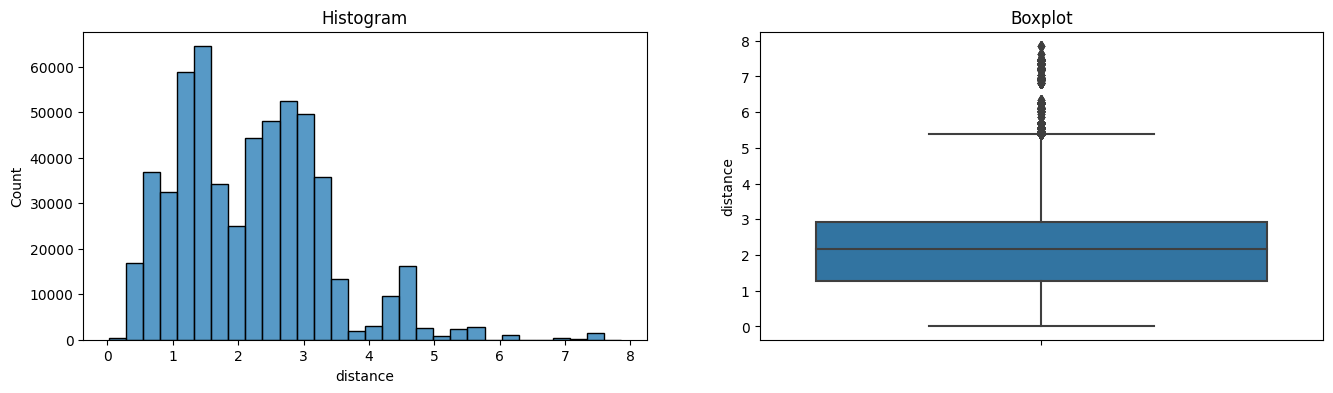


Skewness Value :  0.8330451453580487


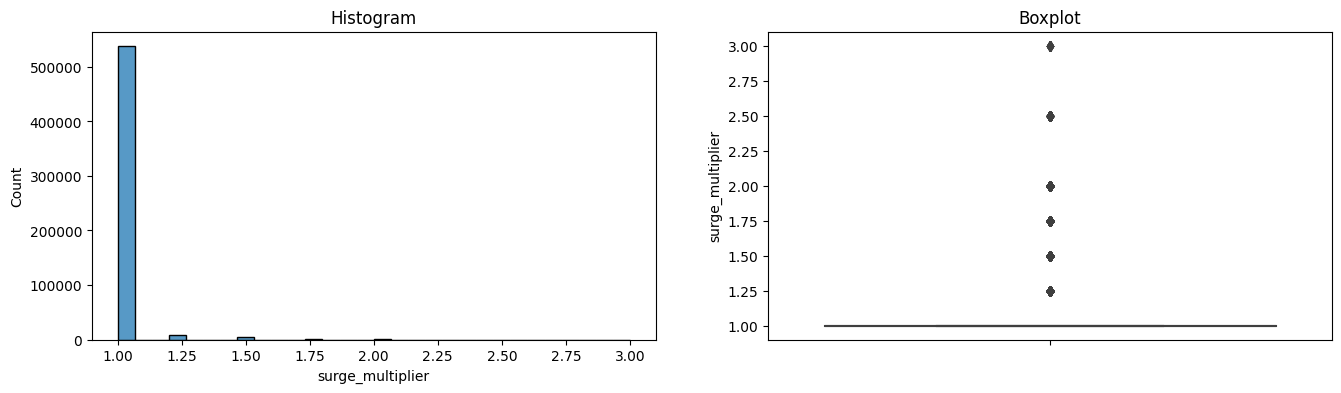


Skewness Value :  8.301701854517765


In [57]:
#Mengecek distribusi data
diagnostic_plots(X_train, 'distance')
diagnostic_plots(X_train, 'surge_multiplier')

Dari grafik diatas maka untuk handling outlier:
- feature `distance` akan dihandling dengan metode `Trimming`. Jika menggunakan metode `censoring`, maka akan mengubah nilai data maximal dan minimal sehingga data tidak valid karena `price` sangat dipengaruhi oleh `distance`. Metode `Trimming` menggunakan **1.5 IQR** karena skewness <1 dan lebih dari 0.5
- feature `surge_multiplier` akan dihandling dengan metode metode `Censoring`. Menurut research saya, kondisi `surge_multiplier` terjadi ketika demand driver > supply driver (Hal ini biasanya terjadi ketika ada event besar dll), `surge_multiplier` biasanya hanya berjalan 1-2 jam, selain itu belum ada rules yang jelas dan maksimal `surge_multiplier` yang dapat dikenakan sehingga **data hanya sebagian diketahui**. oleh karena itu untuk handling outlier menggunakan metode `Censoring` (https://en.wikipedia.org/wiki/Censoring_(statistics), https://gigworker.com/your-complete-guide-to-uber-surge-pricing/)

In [58]:
#Perhitungan IQR
IQR_distance = X_train['distance'].quantile(0.75) - X_train['distance'].quantile(0.25)

In [59]:
#Perhitungan lower dan upper boundaries
lower_boundary_distance = X_train['distance'].quantile(0.25) - (IQR_distance * 1.5)
upper_boundary_distance = X_train['distance'].quantile(0.75) + (IQR_distance * 1.5)

print('Feature Distance')
print('Lower Boundaries ', lower_boundary_distance)
print('Upper Boundaries ', upper_boundary_distance)


Feature Distance
Lower Boundaries  -1.18
Upper Boundaries  5.38


In [60]:
#Membuat slicing Dataframe outlier
outlier_distance = X_train[(X_train['distance']<lower_boundary_distance) |(X_train['distance']>upper_boundary_distance)]
print('Jumlah Dataset Train ', len(X_train))
print('Jumlah Outlier ', len(outlier_distance))
print('Persentase Outlier ' , len(outlier_distance)/len(X_train)*100)

Jumlah Dataset Train  554456
Jumlah Outlier  6879
Persentase Outlier  1.2406755450387406


In [61]:
#Membuat slicing X_train tanpa outlier
X_train = X_train[(X_train['distance']>=lower_boundary_distance) & (X_train['distance']<=upper_boundary_distance)]

print('Jumlah Dataset Train (setelah handling outlier Distance) ' , len(X_train))

Jumlah Dataset Train (setelah handling outlier Distance)  547577


In [62]:
#List index yang ditrim pada X_train
trim_drop_distance = outlier_distance.index.to_list()

In [63]:
#drop data pada y_train
y_train.drop(axis=0, index=trim_drop_distance,inplace=True)

In [64]:
# Create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap right karena nilai surge tidak mungkin negatuf
                          fold=0.01,variables=['surge_multiplier'])

windsoriser.fit(X_train)


Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['surge_multiplier'])

In [65]:
#Transform variabel X train dan X test
X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

In [66]:
#Pengecekan menggunakan fungsi .isnull().sum()
X_train.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64

In [67]:
#Pengecekan menggunakan fungsi .isnull().sum()
X_test.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64

In [68]:
#Pengecekan menggunakan fungsi .isnull().sum()
y_train.isnull().sum()

43220

In [69]:
#Membuat dataframe agar dapat di-list indexnya
df_y_train = pd.DataFrame(y_train)

In [70]:
#Mengecek index y_train yang null
y_train_indexdrop = df_y_train[df_y_train['price'].isnull()].index.to_list()

In [71]:
#drop data pada x_train
X_train.drop(axis=0, index=y_train_indexdrop,inplace=True)

In [72]:
#drop data pada y_train
y_train.dropna(inplace=True)

In [73]:
#pengecekan ulang null values
y_train.isnull().sum()

0

In [74]:
#Pengecekan menggunakan fungsi .isnull().sum()
y_test.isnull().sum()

11033

In [75]:
#Membuat dataframe agar dapat di-list indexnya
df_y_test = pd.DataFrame(y_test)

In [76]:
#Mengecek index y_train yang null
y_test_indexdrop = df_y_test[df_y_test['price'].isnull()].index.to_list()

In [77]:
#drop data pada x_test
X_test.drop(axis=0, index=y_test_indexdrop,inplace=True)

In [78]:
#drop data pada y_train
y_test.dropna(inplace=True)

In [79]:
#pengecekan ulang null values
y_test.isnull().sum()

0

In [80]:
# Mengklasifikasikan kolom number dan kategorik

num_columns_train = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns_train = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns_train)
print('Cat Columns : ', cat_columns_train)

Num Columns :  ['distance', 'surge_multiplier']
Cat Columns :  ['cab_type', 'name']


In [81]:
# split train dan tes berdasarkan kategori kolom

X_train_num = X_train[num_columns_train]
X_test_num = X_test[num_columns_train]

X_train_cat = X_train[cat_columns_train]
X_test_cat = X_test[cat_columns_train]


In [82]:
#print x_train_num
X_train_num

,distance,surge_multiplier
499043,1.61,1.0
419201,2.00,1.0
395682,2.77,1.0
100690,1.91,1.0
619262,2.50,1.0
...,...,...
358724,4.37,1.0
516374,0.72,1.0
491926,0.58,1.0
297103,1.88,1.0


In [83]:
#Pengecekan skewness pada tiap feature

print('X_train')
print('X_train feature distance skew ', X_train_num['distance'].skew())
print('X_train feature surge_multiplier skew ', X_train_num['surge_multiplier'].skew())

X_train
X_train feature distance skew  0.4487465653989167
X_train feature surge_multiplier skew  6.040396631573302


In [84]:
#Sebelumnya saya define nama feature ke dalam variabel untuk inferensia
norm_feature = ['distance']
skew_feature = ['surge_multiplier']

In [85]:
# Definisi scaler dan fit scaler
norm_scaler = StandardScaler()
skew_scaler = RobustScaler()
norm_scaler.fit(X_train_num[norm_feature])
skew_scaler.fit(X_train_num[skew_feature])

RobustScaler()

In [86]:
#copy terlebih dahulu ke variabel baru
X_train_num_scaled = X_train_num.copy()
X_test_num_scaled = X_test_num.copy()

In [87]:
#Transform X_train dan X_test
X_train_num_scaled[norm_feature] = norm_scaler.transform(X_train_num[norm_feature])
X_test_num_scaled[norm_feature] = norm_scaler.transform(X_test_num[norm_feature])
X_train_num_scaled[skew_feature] = skew_scaler.transform(X_train_num[skew_feature])
X_test_num_scaled[skew_feature] = skew_scaler.transform(X_test_num[skew_feature])

In [88]:
#print x_train_num_scaled

X_train_num_scaled

,distance,surge_multiplier
499043,-0.505746,0.0
419201,-0.134545,0.0
395682,0.598340,0.0
100690,-0.220206,0.0
619262,0.341354,0.0
...,...,...
358724,2.121216,0.0
516374,-1.352845,0.0
491926,-1.486097,0.0
297103,-0.248760,0.0


In [89]:
# Definisi onehotencoder ke variabel
encoder= OneHotEncoder()
encoder.fit(X_train_cat)

OneHotEncoder()

In [90]:
#transform ke x_train_cat dan x_test_cat
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray())
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray())


In [91]:
#print X_train_cat_encoded
X_train_cat_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
504353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
504354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
504355,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[-0.50574554,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13454452,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59833956,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.48609697,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.24876022,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65803314,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [93]:
#Pendefinisian Model
model_lin_reg = LinearRegression()
model_ridge = Ridge()

In [94]:
#fit X_train_final dan y_train ke model
mod_lin_reg =model_lin_reg.fit(X_train_final,y_train)

In [95]:
#fit X_train_final dan y_train ke model
mod_ridge = model_ridge.fit(X_train_final,y_train)

In [96]:
#Membuat variabel yang akan di iterasi
space = dict()
space['solver'] = ['auto']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]

In [97]:
#Membuat model search
search = RandomizedSearchCV(model_ridge, space, n_iter=500, scoring='r2', n_jobs=-1, random_state=1)

In [98]:
#fit X_train_final dan y_train ke variabel result
result = search.fit(X_train_final,y_train)

In [99]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9268257492445813
Best Hyperparameters: {'alpha': 1.0514533396856733e-05, 'fit_intercept': True, 'solver': 'auto'}


In [100]:
#Membuat model optimasi dan fit dengan data training
model_ridge_opt = Ridge(alpha= 1.3437810129158048e-05, fit_intercept= True)
mod_ridge_opt = model_ridge_opt.fit(X_train_final,y_train)

In [101]:
#Prediksi y pada linear regression dan ridge
y_pred_train_lin = mod_lin_reg.predict(X_train_final)
y_pred_test_lin = mod_lin_reg.predict(X_test_final)

In [135]:

#Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', min(y_test))
print('Nilai max test-set ', max(y_test))
print('Nilai rata-rata test-set ', y_test.mean())
print('\n')
print('Pred-Set')
print('Nilai min pred ', min(y_pred_test_lin))
print('Nilai max pred ', max(y_pred_test_lin))
print('Nilai rata-rata pred ', y_pred_test_lin.mean())

Test-Set
Nilai min test-set  2.5
Nilai max test-set  92.0
Nilai rata-rata test-set  16.562424166418463


Pred-Set
Nilai min pred  0.9275588989257812
Nilai max pred  52.727294921875
Nilai rata-rata pred  16.56546264037043


In [145]:
#Membuat dataframe utk melihat mana prediksi yang lebih, mana prediksi yang kurang
lin_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_pred_test_lin})
lin_pred['indicator'] = np.where(lin_pred['prediction'] > lin_pred['actual'], 'lebih', 'kurang')
lin_pred_group = lin_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
lin_pred_group

,indicator,counts
1,lebih,68695
0,kurang,58887


Dari informasi diatas dapat disimpulkan bahwa :

- Model memiliki prediksi harga dengan nilai minimal **0.92**, nilai maksimal **52.72** dan rata-rata nilai prediksi adalah **16.56**
- Nilai min pred-set vs test-set memiliki selisih yang kecil yaitu **1.58** 
- Nilai max pred-set vs test-set memiliki selisih yang besar yaitu **40.72** 
- Nilai rata-rata pred-set vs test-set memiliki selisih yang kecil
- Prediksi dari model cenderung lebih dari nilai aktual

In [104]:
print('Linear Regression')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_lin)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_lin)))

print('r2score train = ', r2_score(y_train, y_pred_train_lin))
print('r2score test = ', r2_score(y_test, y_pred_test_lin))

Linear Regression
RMSE train =  2.4919788070653093
RMSE test =  2.5735384155637777
r2score train =  0.9268320699998822
r2score test =  0.9238011079923506


In [105]:
#Membuat kolom untuk melihat koefisien
column_coef = np.concatenate((np.array(X_test_num.columns), encoder.get_feature_names_out(['cab_type','name'])))

In [106]:
#Pengecekan koefisien
coeff_lin = pd.DataFrame(mod_lin_reg.coef_, column_coef,columns=['Coefficient'])
coeff_lin.sort_values(by= 'Coefficient', ascending=False)


,Coefficient
cab_type_Uber,1.113111e+11
cab_type_Lyft,4.442040e+10
surge_multiplier,2.401529e+01
distance,2.998950e+00
name_Lux Black XL,-7.892441e+09
name_Lux Black,-7.892441e+09
name_Lux,-7.892441e+09
name_Lyft XL,-7.892441e+09
name_Lyft,-7.892441e+09
name_Shared,-7.892441e+09


*Note : feature `name` adalah fasilitas layanan transportasi yang dipilih customer. Seperti ukuran mobil dll

Dari informasi diatas dapat disimpulkan bahwa :

- Model Linear Regression termasuk kategori **Good Fit** karena nilai `R2` Score train dan `R2` Score test sama-sama tinggi dan tidak memiliki selisih yang jauh. Artinya **Model** Linear Regression tersebut **dapat menjelaskan 92% Variability/Variance dari suatu dataset**
- Model Linear Regression memiliki error sejumlah +- 2.5. Contohnya jika hasil prediksi model adalah harga 80 maka ada kemungkinan harga aktualnya 77.5 atau bisa juga 82.5
- Faktor prediksi harga tinggi dari Model Linear Regression adalah pemilihan perusahaan layanan transportasi (Uber/Lyft)
- Faktor prediksi harga rendah dari Model Linear Regression adalah pemilihan jenis layanan transportasi


In [107]:
#Prediksi x train dan x test
y_pred_train_ridge = mod_ridge.predict(X_train_final)
y_pred_test_ridge = mod_ridge.predict(X_test_final)

In [150]:
#Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', min(y_test))
print('Nilai max test-set ', max(y_test))
print('Nilai rata-rata test-set ', y_test.mean())
print('\n')
print('Pred-Set')
print('Nilai min pred ', min(y_pred_test_ridge))
print('Nilai max pred ', max(y_pred_test_ridge))
print('Nilai rata-rata pred ', y_pred_test_ridge.mean())

Test-Set
Nilai min test-set  2.5
Nilai max test-set  92.0
Nilai rata-rata test-set  16.562424166418463


Pred-Set
Nilai min pred  0.9250582827338967
Nilai max pred  52.721839105948234
Nilai rata-rata pred  16.565490979344403


In [151]:
#Membuat dataframe utk melihat mana prediksi yang lebih, mana prediksi yang kurang
ridge_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_pred_test_ridge})
ridge_pred['indicator'] = np.where(ridge_pred['prediction'] > ridge_pred['actual'], 'lebih', 'kurang')
ridge_pred_group = ridge_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
ridge_pred_group

,indicator,counts
1,lebih,68784
0,kurang,58798


Dari informasi diatas dapat disimpulkan bahwa :

- Model memiliki prediksi harga dengan nilai minimal **0.92**, nilai maksimal **52.72** dan rata-rata nilai prediksi adalah **16.56**
- Nilai min pred-set vs test-set memiliki selisih yang kecil yaitu **1.58** 
- Nilai max pred-set vs test-set memiliki selisih yang besar yaitu **40.72** 
- Nilai rata-rata pred-set vs test-set memiliki selisih yang kecil
- Prediksi dari model cenderung lebih dari nilai aktual

In [108]:
print('Linear Regression Ridge')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))

print('r2score train = ', r2_score(y_train, y_pred_train_ridge))
print('r2score test = ', r2_score(y_test, y_pred_test_ridge))

Linear Regression Ridge
RMSE train =  2.4919757944782694
RMSE test =  2.5735047766158363
r2score train =  0.9268322469071848
r2score test =  0.9238030999842274


Kemudian pengecekan koefisien model

In [109]:
#Pengecekan koefisien
coeff_rid = pd.DataFrame(mod_ridge.coef_, column_coef,columns=['Coefficient'])
coeff_rid.sort_values(by= 'Coefficient', ascending=False)

,Coefficient
surge_multiplier,24.010558
name_Lux Black XL,14.896209
name_Black SUV,14.305628
name_Lux Black,5.634455
name_Black,4.554372
distance,2.999015
cab_type_Lyft,0.399558
name_Lux,0.355082
name_UberXL,-0.196237
cab_type_Uber,-0.399558


*Note : feature `name` adalah fasilitas layanan transportasi yang dipilih customer. Seperti ukuran mobil dll

Dari informasi diatas dapat disimpulkan bahwa :

Kesimpulan teknis :

- Model Linear Regression Ridge termasuk kategori **Good Fit** karena nilai `R2` Score train dan `R2` Score test sama-sama tinggi dan tidak memiliki selisih yang jauh. Artinya **Model** Linear Regression tersebut **dapat menjelaskan 92% Variability/Variance dari suatu dataset**
- Model Linear Regression Ridge memiliki error sejumlah +- 2.5. Contohnya jika hasil prediksi model adalah harga 80 maka ada kemungkinan harga aktualnya 77.5 atau bisa juga 82.5
- Faktor prediksi harga tinggi dari Model Linear Regression adalah surge_multiplier
- Faktor prediksi harga rendah dari Model Linear Regression adalah pemilihan jenis layanan transportasi


Dari 2 Evaluasi tersebut dapat disimpulkan bahwa Model Linear Regression Ridge lebih baik dari pada Model Linear Regression meskipun hasil tesnya tidka jauh berbeda

In [110]:
#Prediksi y_train dan y_test
y_pred_train_ridgeopt = mod_ridge_opt.predict(X_train_final)
y_pred_test_ridgeopt = mod_ridge_opt.predict(X_test_final)

In [152]:
#Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', min(y_test))
print('Nilai max test-set ', max(y_test))
print('Nilai rata-rata test-set ', y_test.mean())
print('\n')
print('Pred-Set')
print('Nilai min pred ', min(y_pred_test_ridgeopt))
print('Nilai max pred ', max(y_pred_test_ridgeopt))
print('Nilai rata-rata pred ', y_pred_test_ridgeopt.mean())

Test-Set
Nilai min test-set  2.5
Nilai max test-set  92.0
Nilai rata-rata test-set  16.562424166418463


Pred-Set
Nilai min pred  0.9248241583015631
Nilai max pred  52.7268984936891
Nilai rata-rata pred  16.56548738621501


In [153]:
#Membuat dataframe utk melihat mana prediksi yang lebih, mana prediksi yang kurang
opt_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_pred_test_ridgeopt})
opt_pred['indicator'] = np.where(opt_pred['prediction'] > opt_pred['actual'], 'lebih', 'kurang')
opt_pred_group = opt_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
opt_pred_group

,indicator,counts
1,lebih,68785
0,kurang,58797


Dari informasi diatas dapat disimpulkan bahwa :

- Model memiliki prediksi harga dengan nilai minimal **0.92**, nilai maksimal **52.72** dan rata-rata nilai prediksi adalah **16.56**
- Nilai min pred-set vs test-set memiliki selisih yang kecil yaitu **1.58** 
- Nilai max pred-set vs test-set memiliki selisih yang besar yaitu **40.72** 
- Nilai rata-rata pred-set vs test-set memiliki selisih yang kecil
- Prediksi dari model cenderung lebih dari nilai aktual

In [154]:
print('Linear Regression Ridge Optimization')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_ridgeopt)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_ridgeopt)))

print('r2score train = ', r2_score(y_train, y_pred_train_ridgeopt))
print('r2score test = ', r2_score(y_test, y_pred_test_ridgeopt))

Linear Regression Ridge Optimization
RMSE train =  2.4919756920044667
RMSE test =  2.573495417554563
r2score train =  0.9268322529247214
r2score test =  0.9238036541935422


Kemudian pengecekan koefisien model

In [155]:
#Pengecekan koefisien
coeff_rid_opt = pd.DataFrame(mod_ridge_opt.coef_, column_coef,columns=['Coefficient'])
coeff_rid_opt.sort_values(by= 'Coefficient', ascending=False)

,Coefficient
surge_multiplier,24.020654
name_Lux Black XL,14.896626
name_Black SUV,14.306375
name_Lux Black,5.634647
name_Black,4.554893
distance,2.999000
cab_type_Lyft,0.399588
name_Lux,0.355144
name_UberXL,-0.195826
cab_type_Uber,-0.399586


Dari informasi diatas dapat disimpulkan bahwa :

Kesimpulan teknis:

- Model Linear Regression Ridge termasuk kategori **Good Fit** karena nilai `R2` Score train dan `R2` Score test sama-sama tinggi dan tidak memiliki selisih yang jauh. Artinya **Model** Linear Regression tersebut **dapat menjelaskan 92% Variability/Variance dari suatu dataset**
- Model Linear Regression Ridge memiliki error sejumlah +- 2.5. Contohnya jika hasil prediksi model adalah harga 80 maka ada kemungkinan harga aktualnya 77.5 atau bisa juga 82.5
- Faktor prediksi harga tinggi dari Model Linear Regression adalah surge_multiplier
- Faktor prediksi harga rendah dari Model Linear Regression adalah pemilihan jenis layanan transportasi

In [156]:
# Selisih R2 score Optimization dan tidak Optimization pada train set
r2_score(y_train, y_pred_train_ridgeopt) -r2_score(y_train, y_pred_train_ridge)

6.017536580138483e-09

In [157]:
# Selisih R2 score Optimization dan tidak Optimization pada test set
r2_score(y_test, y_pred_test_ridgeopt) -r2_score(y_test, y_pred_test_ridge)

5.542093147736793e-07

Dari hasil selisih `R2` Score bisa disimpulkan bahwa model ridge optimasi memiliki performa lebih baik. Sehingga model yang dipilih adalah **Linear Regression Ridge Optimization** dengan parameter `{'alpha': 1.3437810129158048e-05, 'fit_intercept': True, 'normalize': False}`

In [158]:
# Save the Files

with open('censoring.pkl', 'wb') as file_1:
  pickle.dump(windsoriser, file_1)

with open('norm_scaler.pkl', 'wb') as file_2:
  pickle.dump(norm_scaler, file_2)

with open('skew_scaler.pkl', 'wb') as file_3:
  pickle.dump(skew_scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('mod_ridge_opt.pkl', 'wb') as file_5:
  pickle.dump(mod_ridge_opt, file_5)

with open('num_columns_train.txt', 'w') as file_6:
  json.dump(num_columns_train, file_6)

with open('cat_columns_train.txt', 'w') as file_7:
  json.dump(cat_columns_train, file_7)

with open('norm_feature.txt', 'w') as file_8:
  json.dump(norm_feature, file_8)

with open('skew_feature.txt', 'w') as file_9:
  json.dump(skew_feature, file_9)


Dari penelitian diatas dapat diambil kesimpulan bahwa :

- Prediksi harga merupakan salah satu faktor yang dapat meningkatkan *customer satisfaction*. Dengan model prediksi harga yang baik maka dapat meningkatkan *customer satisfaction*.Meningkatnya customer satisfaction dapat **mengurangi risiko** berkurangnya customer. Untuk membuat model prediksi harga yang baik maka diperlukan analisis terlebih dahulu mengenai variabel yang mempengaruhi naik/turunnya harga. 

- Untuk mengetahui variabel yang mempengaruhi naik/turunnya harga saya melakukan analisis terhadap dataset harga Uber & Lyft :

    a. Jenis Perusahaan layanan transportasi (`cab_type`) : Faktor yang **paling berpengaruh** adalah perusahaan layanan transportasi yang dipilih karena setelah eksplorasi rata-rata harga untuk uber adalah 15.79 sedangkan rata-rata harga lyft adalah 17.35

    b. Time Wise (`hour`, `day`, `month`, `date`) : Dari hasil analisis faktor ini **tidak berpengaruh** kuat ke harga karena layanan transportasi uber dan lyft terus digunakan selama 24 jam dengan distribusi yang rata. Mungkin akan berpengaruh ke `surge_multiplier` tapi tidak akan berpengaruh kuat 

    c. Location Wise(`destination`, `source`,`distance`) : Dari 3 faktor ini yang **paling berpengaruh** adalah distance karena tempat pickup dan lokasi hanya menunjukkan koordinat lokasi dan tidak menunjukkan perpindahan. Yang menarik dari location wise adalah setelah eksplorasi lebih lanjut customer uber dan lyft sering berpergian dari `Financial District` ke `Northeastern University` dan ke `Fenway`

    d. Fasilitas layanan transportasi (`name`) : Faktor ini juga **berpengaruh** ke penentuan harga karena semakin exclusive fasilitas yang dipilih maka harga untuk perjalanan jarak yang sama-pun akan lebih mahal
    
    e. Surge Multiplier(`surge_multiplier`) : Faktor ini juga **berpengaruh** ke penentuan harga. Karena jika demand driver>supply driver maka algoritma ini akan aktif untuk menaikkan harga. Sehingga efeknya dapat mengurangi demand driver. Tapi algoritma surge multiplier untuk setiap perusahaan beda.

- Model yang digunakan untuk prediksi harga adalah Model Linear Regression Ridge dengan Parameter Tuning. Parameter yang dipilih adalah `{'alpha': 1.0514533396856733e-05, 'fit_intercept': True, 'solver': 'auto'}` . Kemudian hasil evaluasi dari performa model tersebut adalah sebagai berikut :

    a. Model Linear Regression Ridge termasuk kategori **Good Fit** dan **dapat menjelaskan 92% Variability/Variance dari suatu dataset**. Yang artinya secara bisnis Model prediksi `price` dapat memprediksi `price` dengan baik pada **92%** variability rata-rata untuk setiap variabel (feature). Jika feature terlalu menyimpang (variasi nya diluar 92% variability yang dapat dicover oeh model), maka model tidak dapat memprediksi harga dengan akurat.

    b. Model Linear Regression Ridge memiliki error sejumlah +- 2.5. Yang artinya secara bisnis Hasil prediksi dari `price` memiliki **error** sejumlah +- 2.5. Contohnya jika hasil prediksi model adalah harga 80 maka ada kemungkinan harga aktualnya 77.5 atau bisa juga 82.5

    c. Faktor prediksi harga tinggi dari Model Linear Regression adalah surge_multiplier
    
    d. Faktor prediksi harga rendah dari Model Linear Regression adalah pemilihan jenis layanan transportasi

    e. Nilai min pred-set vs test-set memiliki selisih yang kecil yaitu **1.58** 

    f. Nilai max pred-set vs test-set memiliki selisih yang besar yaitu **40.72** 

    g. Nilai rata-rata pred-set vs test-set memiliki selisih yang kecil
 
    h. Prediksi dari model cenderung lebih dari nilai aktual

- Secara bisnis model tersebut memiliki kelebihan dan kelemahan :

    a. Kelebihan : 
    
    1. Sudah termasuk **kategori baik** karena untuk **domain yang berhubungan dengan uang** nilai yang diharapkan adalah 90%. 

    b. Kelemahan : 
    
    1. Susah memprediksi data outlier/tidak normal. Sebagai contoh misalnya ada customer memesan layanan transportasi dengan `fasilitas` layanan `shared` akan tetapi `shared` dengan 4-5 orang. Karena hal ini bukan hal yang umum dilakukan maka dapat menyebabkan model salah memprediksi harga. 
    
    2. Hubungan antara harga dan feature lain dianggap linear seperti contoh nya ketika customer memesan layanan transportasi dengan fasilitas layanan `UberXL` seharusnya harganya lebih mahal dari fasilitas layanan `Uber` akan tetapi karena dipengaruhi oleh diskon loyalitas, surge multiplier, shared/tidak maka bisa menyebabkan harga `UberXL` lebih murah

    3. Model cenderung memprediksi harga lebih tinggi dari aktual

- Untuk Continuous Improvement :

    Model bisa dikembangkan dengan membuat model prediksi `surge multiplier` terlebih dahulu kemudian setelah `surge_multiplier` ter-prediksi maka hasil prediksi `surge_miltiplier` digunakan ke model prediksi `price` untuk memprediksi harga


## Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Asumsi yang digunakan pada linear regression adalah :

- Linearity : Hubungan X dan y diasumsikan **Linear**  karena `Linear Regression` menggunakan konsep utama `Gradien`. `Gradien` digunakan untuk mengukur kemiringan dari suatu garis. Garis tersebut nantinya akan digunakan untuk prediksi nilai yang tidak diketahui. `Gradien` hanya bisa digunakan pada komponen yang **Linear**

- Independence : Model Linear Regression tidak mempertimbangkan multicollinearity (Hubungan antar variabel independen). Kembali lagi ke poin sebelumnya, Linear Regression mengacu pada konsep `Gradien` sehingga persamaan garis nya adalah **y=mx+c** . Bisa dilihat bahwa dari persamaan tersebut Linear Regression hanya mempertimbangkan hubungan antara semua feature X ke feature y(target) dan tidak mempertimbangkan hubungan antar feature independen. Yang artinya hanya berjalan 1 arah

- Normality : Model Linear Regression meng-asumsikan bahwa nilai pada model berdistribusi normal. Karena model ini menarik 1 garis lurus berdasarkan kecenderungan kelas data untuk memprediksi ataupun klasifikasi. Oleh karena itu Linear Regression tidak akan menarik ke **titik yang tidak terpusat (tidak normal/outlier)** sehingga hasil prediksinya pun juga tidak dapat memprediksi secara akurat untuk nilai-nilai yang tidak terpusat karena tidak dilalui oleh garis prediksi

- Homoscedasticity : Model ini menganggap `variance` pada setiap level X sama. Karena model ini membuat **persamaan matematis yang fix untuk 1 model** sehingga variance dari model ini sama

- No Autocorellation : Model linear regression menganggap bahwa tidak ada Autocorellation. Yang artinya Model ini **tidak dipengaruhi** oleh nilai sebelumnya. Karena konsep `Gradien` pada persamaan garis adalah **membuat 1 persamaan fix** untuk seluruh nilai yang dilalui garis. Persamaan tersebut dibentuk dengan adanya data yang terpusat pada garis tersebut. Sehingga persamaan ini **tidak dipengaruhi oleh nilai sebelumnya**

## Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

In [116]:
#call coefficient/slope
coeff_rid.sort_values(by= 'Coefficient', ascending=False)

,Coefficient
surge_multiplier,24.010558
name_Lux Black XL,14.896209
name_Black SUV,14.305628
name_Lux Black,5.634455
name_Black,4.554372
distance,2.999015
cab_type_Lyft,0.399558
name_Lux,0.355082
name_UberXL,-0.196237
cab_type_Uber,-0.399558


*Note : feature `name` adalah fasilitas layanan transportasi yang dipilih customer. Seperti ukuran mobil dll

In [117]:
#Call intercept
mod_ridge_opt.intercept_

16.147303785093158

Interpretasi

- Intercept

    a. Secara Bisnis : Harga dasar dari layanan transportasi adalah 16 (tanpa adanya pemilihan fasilitas, input jarak dll)

    b. Secara Teknis : Model memiliki persamaan awal yaitu pada titik (0, 16.14) yang memotong sumbu X pada 0

- Slope

    a. Secara Bisnis :

     - `surge_multiplier` : Jika `surge_multiplier` **meningkat** sejumlah 1 maka `price` akan meningkat sejumlah 24.01
     - `Lux Black XL` : Jika Fasilitas `Lux Black XL` **dipilih** maka `price` akan meningkat sejumlah 14.89
     - `Black SUV` : Jika Fasilitas `Black SUV` **dipilih** maka `price` akan meningkat sejumlah 14.3
     - `Lux Black` : Jika Fasilitas `Lux Black` **dipilih** maka `price` akan meningkat sejumlah 5.63
     - `Black` : Jika Fasilitas `Black` **dipilih** maka `price` akan meningkat sejumlah 4.55
     - `distance` : Jika `distance` **meningkat** sejumlah 1 maka `price` akan meningkat sejumlah 2.99
     - `Lyft` (Company)  : Jika **memilih** jasa transportasi dari `Lyft`  maka `price` akan meningkat sejumlah 0.39
     - `Lux` : Jika Fasilitas `Lux`  **dipilih** maka `price` akan meningkat sejumlah 0.35
     - `UberXL` : Jika Fasilitas `UberXL` **dipilih** maka `price` akan *menurun* sejumlah -0.19
     - `Uber` (Company)  : Jika **memilih** jasa transportasi dari `Uber`  maka `price` akan *menurun* sejumlah -0.39
     - `Lyft XL` : Jika Fasilitas `Lyft XL` **dipilih** maka `price` akan *menurun* sejumlah -2.09 
     - `UberX` : Jika Fasilitas `UberX` **dipilih** maka `price` akan *menurun* sejumlah -6.02
     - `WAF` : Jika Fasilitas `WAF` **dipilih** maka `price` akan *menurun* sejumlah -6.02
     - `UberPool` : Jika Fasilitas `UberPool`  **dipilih** maka `price` akan *menurun* sejumlah -7.01
     - `Lyft` (Fasilitas) : Jika Fasilitas `Lyft` **dipilih** maka `price` akan *menurun* sejumlah -7.76
     - `Shared` : Jika Fasilitas `Shared` **dipilih** maka `price` akan *menurun* sejumlah -10.62
     
     b. Secara Teknis :

     - `surge_multiplier` : Jika X meningkat sejumlah 1 maka y akan meningkat sejumlah 24.01
     - `Lux Black XL` : Jika X bernilai 1 maka y akan meningkat sejumlah 14.89
     - `Black SUV` : Jika X bernilai 1 maka y akan meningkat sejumlah 14.3
     - `Lux Black` : Jika X bernilai 1 maka y akan meningkat sejumlah 5.63
     - `Black` : Jika X bernilai 1 maka y akan meningkat sejumlah 4.55
     - `distance` : Jika X meningkat sejumlah 1 maka y akan meningkat sejumlah 2.99
     - `Lyft` (Company)  : Jika X bernilai 1 maka y akan meningkat sejumlah 0.39
     - `Lux` : Jika X bernilai 1 maka y akan meningkat sejumlah 0.35
     - `UberXL` : Jika X bernilai 1 maka y akan *menurun* sejumlah -0.19
     - `Uber` (Company)  : Jika X bernilai 1 maka y akan *menurun* sejumlah -0.39
     - `Lyft XL` : Jika X bernilai 1 maka y akan *menurun* sejumlah -2.09 
     - `UberX` : Jika X bernilai 1 maka y akan *menurun* sejumlah -6.02
     - `WAF` : Jika X bernilai 1 maka y akan *menurun* sejumlah -6.02
     - `UberPool` : Jika X bernilai 1 maka y akan *menurun* sejumlah -7.01
     - `Lyft` (Fasilitas) : Jika X bernilai 1 maka  y akan meningkat sejumlah -7.76
     - `Shared` : Jika X bernilai 1 maka y akan *menurun* sejumlah -10.62
